In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.models import Sequential # try tensorflow.keras.models in case of import error
from keras.layers import Dense # try tensorflow.keras.layers in case of import error

In [2]:
# import training/testing dataset

training_df = pd.read_csv(Path("Resources/training_dataset_original.csv"))
testing_df = pd.read_csv(Path("Resources/testing_dataset.csv"))

In [3]:
# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
display(X_train.tail())
display(y_train[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
59006,-0.224841,-0.182815,-0.182817,-0.189411,-0.191518,-0.105244,-0.213641,-0.189216,-0.202266,-0.220081,-0.218942,-0.174220,-0.205580,-0.206912,-0.086730,-0.202266,-0.217191,-0.194969
59007,-0.149498,-0.153444,-0.136048,-0.198706,-0.078807,-0.131121,-0.161011,-0.177011,-0.171751,-0.191696,-0.215157,-0.208470,-0.178749,-0.166843,-0.165335,-0.171751,-0.200379,-0.158183
59008,-0.223526,-0.179687,-0.181686,-0.203005,-0.191518,-0.127842,-0.213297,-0.184402,-0.202271,-0.219337,-0.218802,-0.193295,-0.212906,-0.205220,-0.105513,-0.202271,-0.216480,-0.192328
59009,1.004145,1.004144,0.589128,0.659983,1.504063,0.315861,1.533036,0.084743,0.930268,0.630094,0.604774,0.629126,0.563857,1.107517,0.288940,0.930268,0.760133,0.937813
59010,-0.224761,-0.182817,-0.182834,-0.192112,-0.191518,-0.113492,-0.213650,-0.188879,-0.202271,-0.218346,-0.215930,-0.177898,-0.205592,-0.195994,-0.092337,-0.202271,-0.212037,-0.194449


59006    0
59007    0
59008    0
59009    1
59010    0
Name: status, dtype: int64

In [4]:
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]
display(X_test.tail())
display(y_test[-5:])

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses
19666,-0.215226,-0.164916,-0.194334,-0.181122,-0.181608,-0.094862,-0.208887,-0.175621,-0.182696,-0.225049,-0.236255,-0.163658,-0.193834,-0.199539,-0.105437,-0.182696,-0.226363,-0.175619
19667,-0.212986,-0.165046,-0.194220,-0.184832,-0.185888,-0.103520,-0.210132,-0.175893,-0.182165,-0.224273,-0.229114,-0.168517,-0.191778,-0.200033,-0.406323,-0.182165,-0.223765,-0.174307
19668,-0.210084,-0.161478,-0.193038,-0.182268,-0.162754,-0.098553,-0.216656,-0.172556,-0.178827,-0.223939,-0.236561,-0.165623,-0.189595,-0.205375,-0.102255,-0.178827,-0.228833,-0.170958
19669,-0.198817,-0.084905,-0.122853,-0.142938,-0.144338,-0.087156,-0.208782,-0.158340,-0.112154,-0.171970,-0.178470,-0.140385,-0.158953,-0.172050,-0.057595,-0.112154,-0.185918,-0.101810
19670,-0.200724,-0.063058,-0.087832,-0.115193,-0.159361,-0.063184,-0.210541,-0.141537,-0.091192,-0.141662,-0.144627,-0.117248,-0.143870,-0.169791,-0.019760,-0.091192,-0.161145,-0.082975


19666    0
19667    0
19668    0
19669    0
19670    0
Name: status, dtype: int64

# Sequential Model

In [5]:
# set instance

neural_network_1 = Sequential()


In [6]:
# set parameters for neural network model

number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 8


In [7]:
# set first hidden layers
neural_network_1.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))

# set second hidden layers
neural_network_1.add(Dense(units=hidden_nodes_layer2, activation='tanh'))

# output layer
neural_network_1.add(Dense(units=number_output, activation='sigmoid'))

# display summary
neural_network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile the model
neural_network_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model using 100 epochs and the training data
with tf.device('cpu:0'):
    neural_network_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
1845/1845 [==============================] - 6s 3ms/step - loss: 0.2509 - accuracy: 0.9297
Epoch 2/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.2351 - accuracy: 0.9327
Epoch 3/100
1845/1845 [==============================] - 5s 2ms/step - loss: 0.2325 - accuracy: 0.9330
Epoch 4/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9330
Epoch 5/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9330
Epoch 6/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9331
Epoch 7/100
1845/1845 [==============================] - 5s 2ms/step - loss: 0.2296 - accuracy: 0.9331
Epoch 8/100
1845/1845 [==============================] - 5s 2ms/step - loss: 0.2289 - accuracy: 0.9332
Epoch 9/100
1845/1845 [==============================] - 5s 2ms/step - loss: 0.2287 - accuracy: 0.9333
Epoch 10/100
1845/1845 [==============================] - 5s 3ms/step - l

In [10]:
# save trained model
neural_network_1.save("Resources/neural_network_models/model_1.h5")

615/615 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.55      0.04      0.08      1254

    accuracy                           0.94     19671
   macro avg       0.74      0.52      0.52     19671
weighted avg       0.91      0.94      0.91     19671



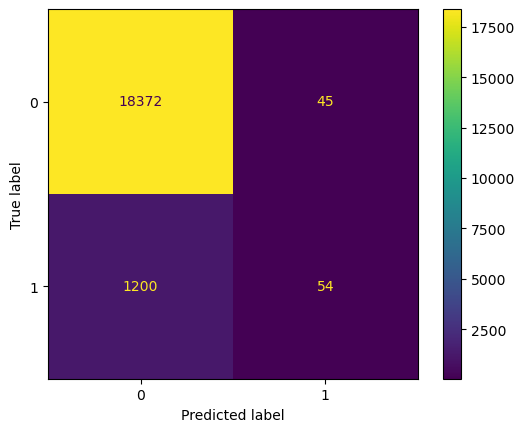

In [11]:
# make prediction and print classification report
y_pred_1 = neural_network_1.predict(X_test)
y_pred_1 = np.where(y_pred_1 < 0.5, 0, 1)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred_1))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1)).plot()
plt.show()

### Analysis

First of all, the result of this neural network model is too strict.
It has very low precision on category 1 (failed - bankrupt), and just by looking at the confusion matrix, the model estimated too many category 0 (alive) as category 1.

This might be sign of overfitting

# Try different configuration

In [12]:
# create instance
neural_network_2 = Sequential()

# define parameters
number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 9

# set a hidden layers
neural_network_2.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))

# output layer
neural_network_2.add(Dense(units=number_output, activation='sigmoid'))

# display summary
neural_network_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
neural_network_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
with tf.device('cpu:0'):
    neural_network_2.fit(X_train, y_train, epochs=100)

# save the model
neural_network_2.save("Resources/neural_network_models/model_2.h5")

Epoch 1/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9326
Epoch 2/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2388 - accuracy: 0.9327
Epoch 3/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.9328
Epoch 4/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2364 - accuracy: 0.9328
Epoch 5/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2360 - accuracy: 0.9329
Epoch 6/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2355 - accuracy: 0.9328
Epoch 7/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2352 - accuracy: 0.9329
Epoch 8/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2350 - accuracy: 0.9329
Epoch 9/100
1845/1845 [==============================] - 4s 2ms/step - loss: 0.2348 - accuracy: 0.9329
Epoch 10/100
1845/1845 [==============================] - 4s 2ms/step - l

615/615 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.36      0.01      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.65      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671



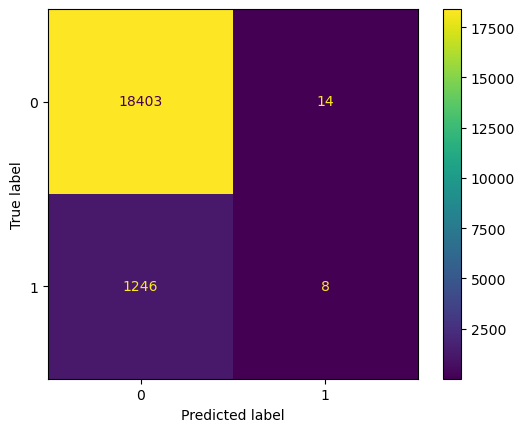

In [14]:
# make prediction and print classification report
y_pred_2 = neural_network_2.predict(X_test)
y_pred_2 = np.where(y_pred_2 < 0.5, 0, 1)

print(classification_report(y_test, y_pred_2))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2)).plot()
plt.show()

### Analysis

This modification did not work very well. Similar results occured.

Next, try with undersampled training data

# Try different parameters

In [15]:
# configure neural network model

neural_network_3 = Sequential()

number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 8


neural_network_3.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))
neural_network_3.add(Dense(units=hidden_nodes_layer2, activation='relu'))
neural_network_3.add(Dense(units=number_output, activation='linear'))

neural_network_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                608       
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model
neural_network_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# fit the model
with tf.device('cpu:0'):
    neural_network_3.fit(X_train, y_train, epochs=100)

# save the model
neural_network_3.save("Resources/neural_network_models/model_3.h5")

Epoch 1/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0761 - mse: 0.0761
Epoch 2/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0619 - mse: 0.0619
Epoch 3/100
1845/1845 [==============================] - 6s 3ms/step - loss: 0.0614 - mse: 0.0614
Epoch 4/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0616 - mse: 0.0616
Epoch 5/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0608 - mse: 0.0608
Epoch 6/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0606 - mse: 0.0606
Epoch 7/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0604 - mse: 0.0604
Epoch 8/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0602 - mse: 0.0602
Epoch 9/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0601 - mse: 0.0601
Epoch 10/100
1845/1845 [==============================] - 5s 3ms/step - loss: 0.0600 - mse: 0.0600
Epoch 11/100
1845/1

In [17]:
# make prediction and print classification report
y_pred_3 = neural_network_3.predict(X_test)

615/615 [==============================] - 1s 1ms/step


In [26]:
pred_df = pd.concat([y_test, pd.Series(y_pred_3[:, 0])], axis=1)
pred_df.columns = ['true', 'pred']
describe = pred_df.describe()
pred_df['pred'].value_counts()

0    18349
1     1322
Name: pred, dtype: int64

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18417
           1       0.24      0.25      0.24      1254

    accuracy                           0.90     19671
   macro avg       0.59      0.60      0.60     19671
weighted avg       0.90      0.90      0.90     19671



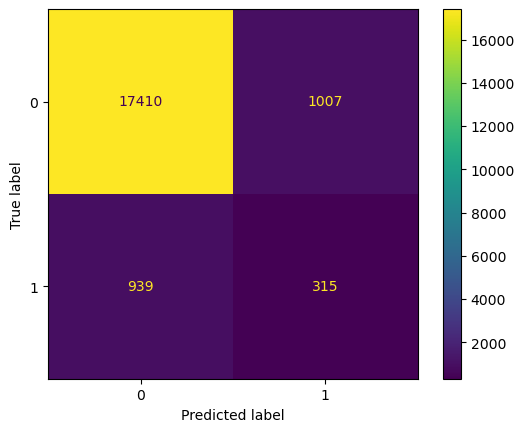

In [28]:
y_pred_3 = np.where(y_pred_3 < 0.5, 0 ,1)
print(classification_report(y_test, y_pred_3))
matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_3)).plot()
plt.show()

# Transfer Learning